# Ornstein-Uhlenbeck Process

Suppouse we have the following dynamics:

$$ dx_{t} = \lambda \left(\theta - x_{t}\right) dt + \sigma dW_{t} $$

Rearrenging the terms to find an easier solution for $x_{t}$

$$ dx_{t} = \lambda \theta dt - \lambda x_{t} dt + \sigma dW_{t} $$

$$ dx_{t} + \lambda x_{t} dt = \lambda \theta dt + \sigma dW_{t} $$

Multiplying both sides for $e^{\lambda t}$

$$ e^{\lambda t} dx_{t} + e^{\lambda t}\lambda x_{t} dt = e^{\lambda t}\lambda \theta dt + e^{\lambda t}\sigma dW_{t} $$

It is easy to see that the left side is equal to $de^{\lambda t}x_{t}$

$$ de^{\lambda t}x_{t} = \underbrace{\frac{\partial x_{t}}{\partial x}}_{1} e^{\lambda t}dx_{t} +  x_{t} \frac{\partial e^{\lambda t}}{\partial t} dt $$

$$ \frac{\partial e^{\lambda t}}{\partial t} dt = \lambda e^{\lambda t} dt $$

$$ de^{\lambda t}x_{t} = e^{\lambda t}dx_{t} +  x_{t} \lambda e^{\lambda t} dt $$

Now it is possible to plug the previous solution on our main equation

$$ de^{\lambda t}x_{t} = e^{\lambda t}\lambda \theta dt + e^{\lambda t}\sigma dW_{t} $$

$$ de^{\lambda t}x_{t} = e^{\lambda t} \left( \lambda \theta dt + \sigma dW_{t}\right) $$


To get the solution for $x_t$

$$ \int_{s}^{t} de^{\lambda t}x_{u} = \int_{s}^{t} \lambda \theta dt + e^{\lambda u} \sigma dW_{u} $$

$$ \int_{s}^{t} de^{\lambda t}x_{u} = e^{\lambda t}\int_{s}^{t} dx_{u} = e^{\lambda t} x_{t} - e^{\lambda s} x_{s} $$

$$ e^{\lambda t} x_{t} - e^{\lambda s} x_{s} = \int_{s}^{t}  e^{-\lambda u} \lambda \theta du + \sigma  e^{\lambda u }  dW_{u}$$ 

$$ x_{t}  = e^{\lambda \left( s-t \right)} x_{s} + \lambda \theta e^{-\lambda t}\int_{s}^{t}  e^{\lambda u }  du + \sigma e^{-\lambda t}\int_{s}^{t}   e^{\lambda u }  dW_{u} $$ 

$$ x_{t}  = e^{\lambda \left( s-t \right)} x_{s} + \lambda \theta e^{-\lambda t} \frac{e^{\lambda t} - e^{\lambda - s }}{ \lambda }  + \sigma e^{-\lambda t}\int_{s}^{t}   e^{\lambda u }  dW_{u} $$ 

$$ x_{t}  = e^{\lambda \left( s-t \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - t \right) } \right)  + \sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} $$ 


$$ \sigma \int_{s}^{t} e^{\lambda\left( u-t \right)}  dW_{u} \sim N\left(0, V\left(s, t\right)\right) $$


With Ito isometry

$$ V\left( s, t\right) = E\left[\left( \sigma \int_{s}^{t} e^{\lambda\left( u-t \right)}  dW_{u} \right)^2\right] - \underbrace{ E\left[ \sigma \int_{s}^{t} e^{\lambda\left( u-t \right)}  dW_{u} \right]^2}_{=0} $$

$$ V\left( s, t\right) = E\left[ \sigma^2 \left(\int_{s}^{t} e^{\lambda\left( u-t \right)}  dW_{u} \right)^2\right]  $$

$$ E\left[ \sigma^2 \left(\int_{s}^{t} e^{\lambda\left( u-t \right)}  dW_{u} \right)^2\right] = E\left[\underbrace{ \sigma^2 \left(\int_{s}^{t} e^{2\lambda\left( u-t \right)}  du \right)}_{constant}\right] = \sigma^2 \left(\int_{s}^{t} e^{2\lambda\left( u-t \right)}  du \right) $$

$$ \sigma^2 \left(\int_{s}^{t} e^{2\lambda\left( u-t \right)}  du \right) = \frac{\sigma^2}{2\lambda} \left[ 1 - e^{-2\lambda\left(t-s\right)} \right]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from IPython.display import display, Markdown, Latex
sns.set()

np.random.seed(35)

In [2]:
# create Ornstein-Uhlenbeck Process
def ou_processes(time_points, num_sims, kappa, sigma, theta=0, initial_value=0):
    """
    create Ornstein-Uhlenbeck Processes from a grid of time points with kappa and sigma
    time_points: t_1, ...,t_n
    """
    # get number of time points
    num_times = len(time_points)
    dt = time_points[1:] - time_points[:-1]
    # generate no_times-1 (exclude time 0) normally distributed random variables \varepsilon
    epsilon = np.random.normal(0,1,(num_sims, num_times-1))
    elt = 0.5/kappa*(1.0 - np.exp(-2.0*kappa*dt))
    V = elt*sigma**2
    sqrtV = np.sqrt(V)
    # create empty process for no_times timepoints
    ou = np.zeros((num_sims, num_times))
    # Set the initial value
    ou[:,0] = initial_value
    # compute the stochastic component
    ou[:,1:] = np.kron(sqrtV,np.ones((num_sims,1))) * epsilon
    # make it into a process using cumulative sum
    for i in range(1,ou.shape[1]):
        ou[:,i] += (theta * (1 - np.exp(-kappa*dt[i-1])) + np.exp(-kappa*dt[i-1])*ou[:,i-1])
    return ou

In [3]:
start_time = 0
end_time = 100
# create time points at which you want to view the OU process
time_points = np.arange(start_time,end_time+1)/10
no_times = len(time_points)
ou = np.zeros(no_times)
print(no_times, ou.shape)

101 (101,)


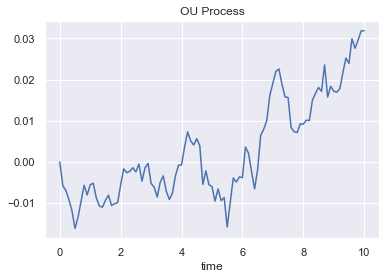

In [4]:
kappa = 0.05
sigma = 0.01
theta = 0.03
sp = ou_processes(time_points, 1, kappa, sigma, theta)
plt.plot(time_points,sp.T)
plt.title('OU Process')
plt.xlabel('time')
plt.show()

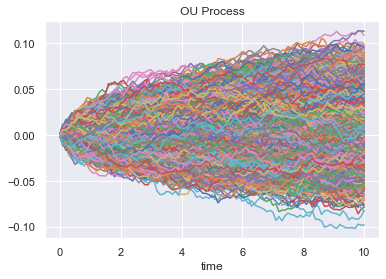

In [5]:
no_sims = 10000
kappa = 0.05
sigma = 0.01
theta = 0.03
sps = ou_processes(time_points, no_sims, kappa, sigma, theta)
plt.plot(time_points,sps.T)
plt.title('OU Process')
plt.xlabel('time')
plt.show()


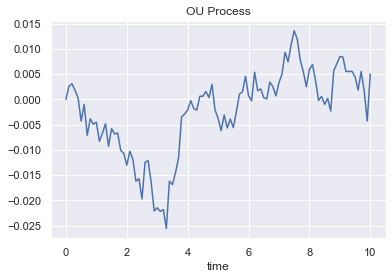

In [6]:
plt.plot(time_points, sps[56,:])
plt.title('OU Process')
plt.xlabel('time')
plt.show()

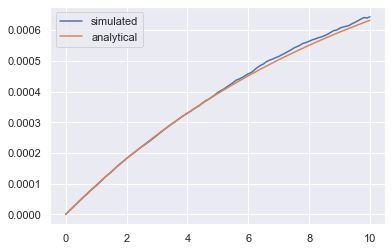

In [7]:
true_var_ou = 0.5*sigma**2*(1.0 - np.exp(-2.0*kappa*time_points))/kappa
mstd = np.var(sps,0)
plt.plot(time_points,mstd, label='simulated')
plt.plot(time_points, true_var_ou, label='analytical')
plt.grid(True)
plt.legend(loc='best')
plt.show()

OU process is known for being a mean reversion process. That is because

$$ \lim_{t \rightarrow \infty} E\left[ x_{t} \right] = \lim_{t \rightarrow \infty} E\left[ e^{\lambda \left( s-t \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - t \right) } \right)  + \underbrace{\sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u}}_{=0} \mid s=s\right] $$

$$ \lim_{t \rightarrow \infty} E\left[ x_{t} \right] = \lim_{t \rightarrow \infty} E\left[ e^{\lambda \left( s-t \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - t \right) } \right) \mid s=s \right] $$

$$ lim_{t \rightarrow \infty} E\left[ x_{t} \right] = \lim_{t \rightarrow \infty} \underbrace{e^{\lambda \left( s-t \right)}}_{= 0} x_{s} + \theta \left( 1 - \underbrace{e^{\lambda\left( s - t \right) }}_{= 0} \right) $$

$$ lim_{t \rightarrow \infty} E\left[ x_{t} \right] = \theta $$

The speed of the mean reversion is defined by lambda 

$$ \lim_{t \rightarrow \infty} VAR\left[ x_{t} \right] = \lim_{t \rightarrow \infty} VAR\left[ \underbrace{e^{\lambda \left( s-t \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - t \right) } \right)}_{=0}  + \sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} \mid s=s\right] $$ 

$$ \lim_{t \rightarrow \infty} \underbrace{VAR\left[ \sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} \mid s=s\right]}_{V(s,t)} = \lim_{t \rightarrow \infty} \frac{\sigma^2}{2\lambda} \left[ 1 - e^{-2\lambda\left(t-s\right)} \right] $$

$$ \lim_{t \rightarrow \infty} VAR\left[ x_{t} \right] = \frac{\sigma^2}{2\lambda} $$

A question we might have is: when it is inifinty? The infinty is not a good way of estimate when the mean will reach $\theta $ because there we do not know when it is. Another way of measure it is using the halfway method. Starting from time $s$ the half way from $x_{s}$ is:

$$ x_{s} + \frac{\theta - x_{s}}{2} $$

Taking time $\rho$ to be at time where the mean is equal to the half way. Doing the math

$$ E \left[ x_{ \rho } \right] = x_{s} + \frac{\theta - x_{s}}{2} $$

$$ e^{\lambda \left( s-\rho \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - \rho \right) } \right) = x_{s} + \frac{\theta - x_{s}}{2} $$

$$ e^{\lambda \left( s-\rho \right)} \left( x_{s} - \theta \right) = x_{s} - \theta + \frac{\theta - x_{s}}{2} $$

$$ e^{\lambda \left( s-\rho \right)} \left( x_{s} - \theta \right) = \frac{2x_{s} - 2\theta + \theta - x_{s}}{2} $$

$$ e^{\lambda \left( s-\rho \right)} \left( x_{s} - \theta \right) = \frac{x_{s} - \theta}{2} $$

$$ e^{\lambda \left( s-\rho \right)}  = \frac{1}{2} $$

$$ \lambda \left( s-\rho \right)  = \ln\left(\frac{1}{2}\right) = -\ln\left( 2\right) $$

$$ \rho  = \frac{\ln\left( 2\right)}{\lambda} + s $$

The speed of the mean revertion depends only on the lambda. So the higher the lambda is, the faster the mean goes to $\theta$.



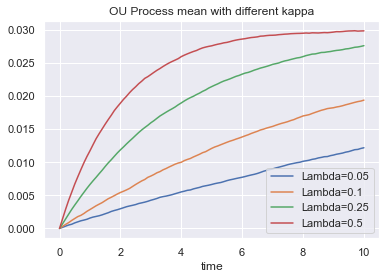

In [8]:
for mult in [1,2,5,10]:
    aux = ou_processes(time_points, no_sims, kappa*mult, sigma, theta)
    aux = np.mean(aux, 0)
    plt.plot(time_points, aux, label = "Lambda=%s" % (kappa*mult))
plt.title('OU Process mean with different kappa')
plt.xlabel('time')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Estimation of the parameters

The Ornstein-Uhlenbeck Process can be seem as an autoregressive(1) model. To estimate the parameters we can use the following.

Here we have the OU process

$$ x_{t}  = e^{\lambda \left( s-t \right)} x_{s} + \theta \left( 1 - e^{\lambda\left( s - t \right) } \right)  + \sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} $$ 

The autoregressive model is defined below:

$$ y_{i+1} = y_{i}\beta + a + e_{i+1}, \ e_{i+1} \sim N\left(0, \sigma_{ar}^{2} \right) $$

The following parameters can be defined as

For the beta:

$$ \beta = e^{\lambda \left( s-t \right)} $$

$$ \frac{ln\left( \beta \right)}{s-t} = -\frac{ln\left( \beta \right)}{\underbrace{t-s}_{dt}} = \lambda $$

For $\theta$

$$ \theta \left( 1 - e^{\lambda\left( s - t \right) } \right) = a $$ 

$$ \theta = \frac{a}{\left( 1 - e^{\lambda\left( s - t \right) } \right)} $$

$$ \theta = \frac{a}{\left( 1 - e^{\frac{ln\left( \beta \right)}{dt}\left( dt \right) } \right)} $$

$$ \theta = \frac{a}{\left( 1 -  \beta  \right)} $$



For the last parameter, we know the variance of the process and that needs to be matched with variance of the AR model

$$ \sigma \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} = e_{i} $$ 

$$ \sqrt{ Var \left( \int_{s}^{t}   e^{\lambda \left( u-t \right) }  dW_{u} \right)} = \underbrace{\sqrt{ Var \left( e_{i} \right)}}_{\sigma_{ar}} $$

$$ \sqrt{ \frac{\sigma^2}{2\lambda} \left[ 1 - e^{-2\lambda\left(t-s\right)} \right] } = \sigma_{ar}$$

$$ \sigma = \sigma_{ar} * \sqrt{ \frac{2\lambda}{ 1 - e^{-2\lambda\left(t-s\right)}} } $$

$$ \sigma = \sigma_{ar} * \sqrt{ \frac{-2\frac{ln\left( \beta \right)}{dt} }{ 1 - e^{2 \frac{ln\left( \beta \right)}{dt} \left(dt\right)}} } $$

$$ \sigma = \sigma_{ar}  \sqrt{ \frac{-2 ln\left( \beta \right) }{dt\left( 1 -  \beta^2 \right) } } $$

SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$, Annual

CURRENCY=Switzerland / Swiss Franc

FREQ=Annual

UNIT=Currency; Per USD

UNIT_MULT=One

FX=Switzerland / Swiss Franc

https://www.quandl.com/data/FED/RXI_N_A_SZ-SWITZERLAND-SPOT-EXCHANGE-RATE-FRANCS-US-Annual

In quandl.get, please replace "Your key" for your key in quandl.

In [9]:
dataSwiUsd = quandl.get("FED/RXI_N_A_SZ", start_date="1900-12-31", end_date="2020-12-31", authtoken="Your key")

y = dataSwiUsd.values[1:]
X = add_constant(dataSwiUsd.values[:-1])
reg = LinearRegression().fit(X, y)
a = reg.intercept_[0]
b = reg.coef_[0,1]
sigma = np.std(y-reg.predict(X))
times = dataSwiUsd.index.year
dt = 1

estimated_lambda = -np.log(b)/dt

estimated_theta = a/(1-a)

estimated_sigma = sigma * np.sqrt(-2 * np.log(b)/ (dt*(1-b**2)))

display(Markdown("$\hat\lambda$ = %s" % estimated_lambda))
display(Markdown("$\hat\Theta $  = %s" % estimated_theta))
display(Markdown("$\hat\sigma$ = %s" %estimated_sigma))

$\hat\lambda$ = 0.1632139695054568

$\hat\Theta $  = 0.225177116047811

$\hat\sigma$ = 0.18147515436428163

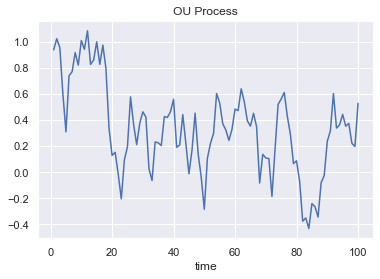

In [10]:
simulation_time = np.arange(1,100+1)
#ou_processes(simulation_time, no_sims, estimated_lambda, estimated_sigma, estimated_theta)
sp = ou_processes(simulation_time, 1,estimated_lambda, estimated_sigma, estimated_theta, dataSwiUsd.values[-1])
plt.plot(simulation_time, sp.T)
plt.title('OU Process')
plt.xlabel('time')
plt.show()

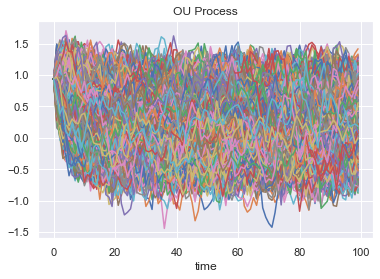

In [11]:
sps = ou_processes(simulation_time, no_sims, estimated_lambda, estimated_sigma, estimated_theta, dataSwiUsd.values[-1])
plt.plot(sps.T)
plt.title('OU Process')
plt.xlabel('time')
plt.show()

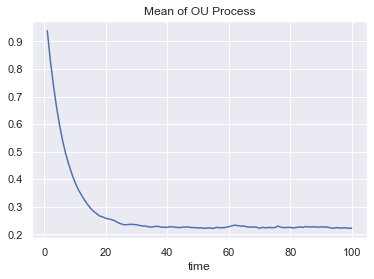

In [12]:
plt.plot(simulation_time, np.mean(sps, 0))
plt.title('Mean of OU Process')
plt.xlabel('time')
plt.grid(True)
plt.show()